In [3]:
from functools import reduce
import pandas as pd 
import itertools as it
from brent import Query, DAG
from brent.common import make_fake_df

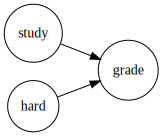

In [4]:
grade = ["good", "pass", "fail"]
study = ["lots", "little", "no"]
hard = ["yes", "no"]
probs = [0.6, 0.3, 0.1, 
         0.9, 0.09, 0.01, 
         0.3, 0.3, 0.4, 
         0.6, 0.2, 0.2, 
         0.1, 0.3, 0.6, 
         0.1, 0.5, 0.4]
zipprod = zip(it.product(study, hard, grade), probs)
tween = reduce(lambda a,b: a+b, [[c]*int(p * 100) for c, p in zipprod])
df = pd.DataFrame(tween, columns=["study", "hard", "grade"])
dag = (DAG(df)
       .add_edge("study", "grade")
       .add_edge("hard", "grade"))
dag.plot()

```
p()
```

In [5]:
Query(dag).given(hard="no", study="little").infer(give_table=True)

,hard,study,grade,prob
0,no,little,good,0.6
1,no,little,pass,0.2
2,no,little,fail,0.2


In [6]:
q = Query(dag).given(study="lots", grade="good")
q.infer()

{'hard': {'no': 0.6000000000000001, 'yes': 0.4},
 'study': {'lots': 1.0},
 'grade': {'good': 1.0}}

In [7]:
p_not_hard, p_hard = q.infer()['hard']['no'], q.infer()['hard']['yes']

In [9]:
for studied in ['little', 'no']:
    v1 = 1 - Query(dag).given(hard="yes", study=studied).infer()['grade']['fail']
    v2 = 1 - Query(dag).given(hard="no", study=studied).infer()['grade']['fail']
    print(f"p(grade=pass|study={studied}, given(study=lots) -> grade=pass) = {v1*p_hard + v2*p_not_hard}")

p(grade=pass|study=little, given(study=lots) -> grade=pass) = 0.7200000000000001
p(grade=pass|study=no, given(study=lots) -> grade=pass) = 0.5200000000000001
